# Set the environment

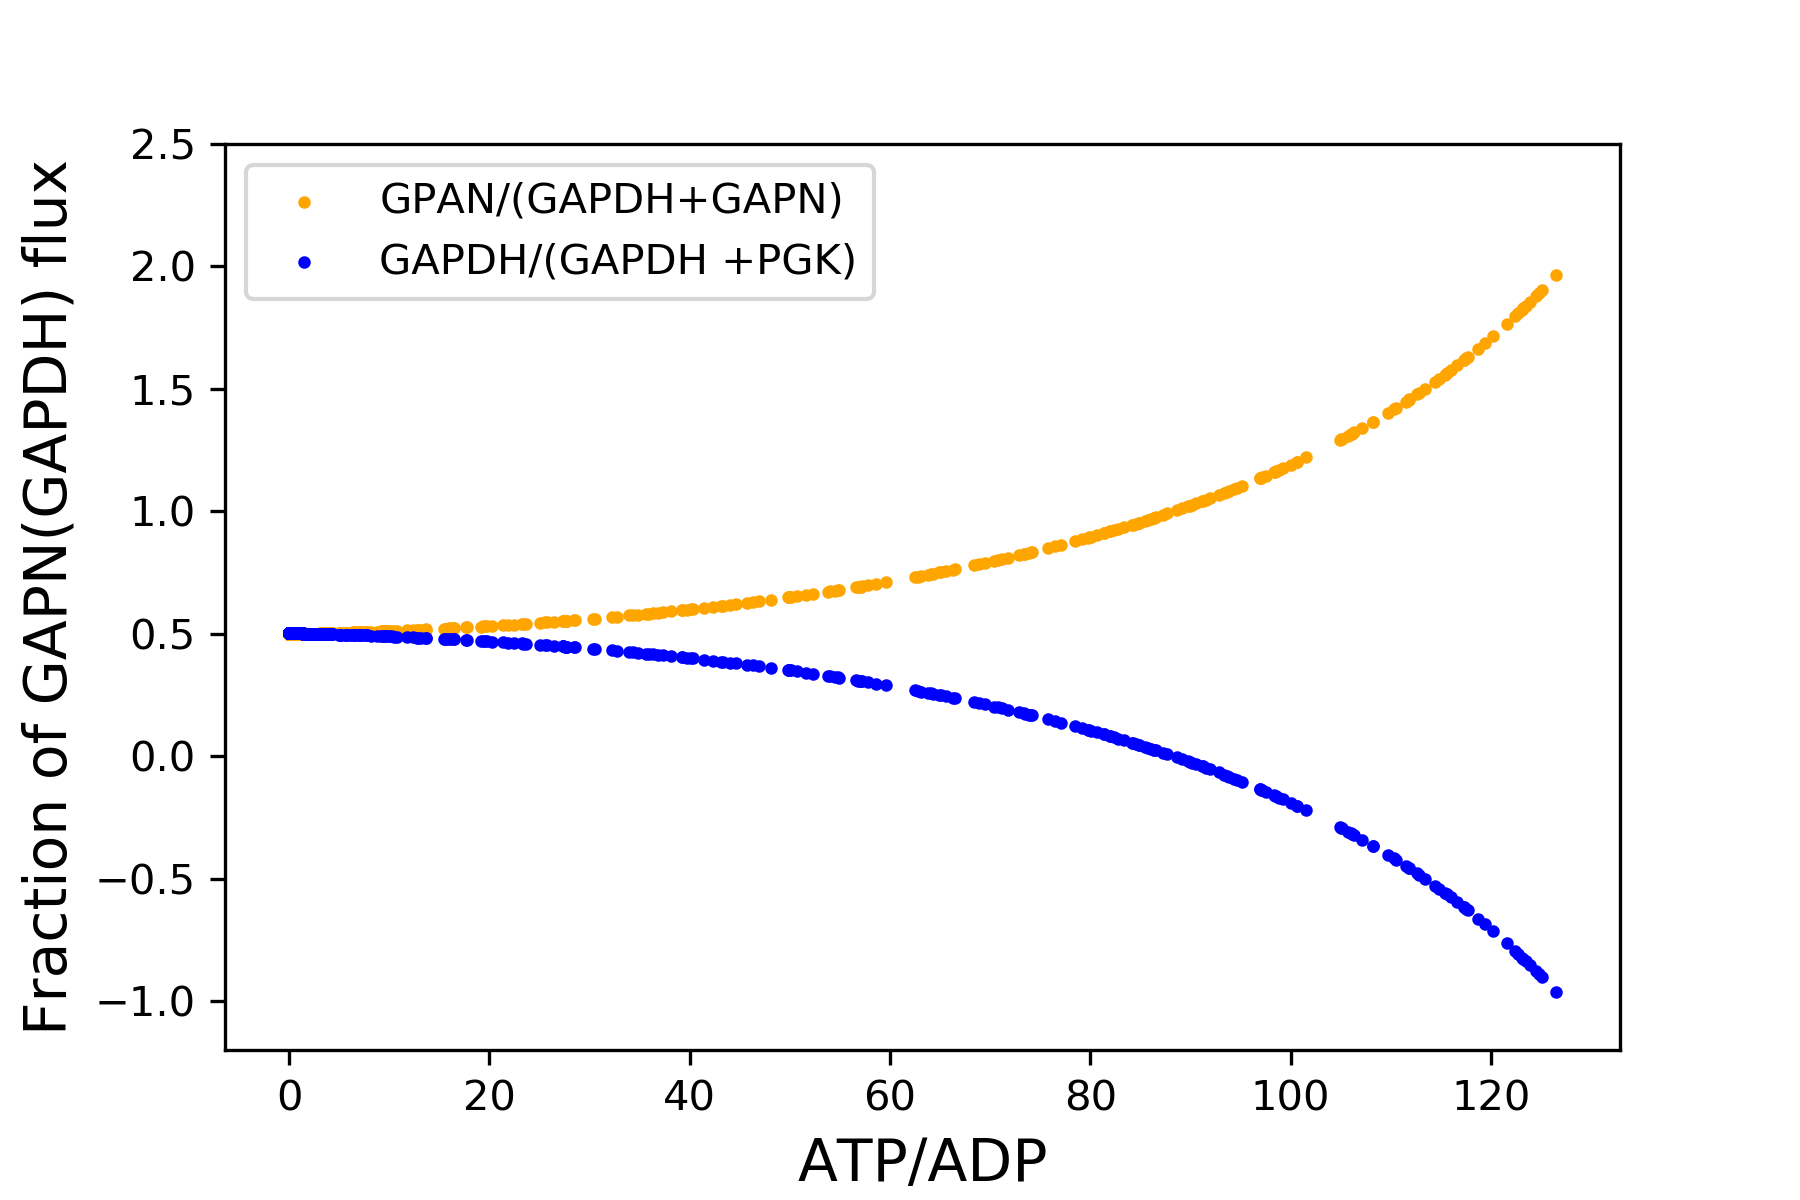

In [84]:
from IPython.display import Image, 

Image("../figures/figure2.png")

[many others things](http://dict.youdao.com/w/gut-microbiome/#keyfrom=dict2.top)

In [46]:
# set the envoiroment
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import flux_variability_analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import escher
from escher import Builder
from utils import show_map
from utils.check_precursor_problem import check_precursor_problem

## load the model published by Schomburg group in 2016

In [53]:
model = cobra.io.read_sbml_model('../models/Sulfolobus-solfataricus_D-glucose.xml')

In [64]:
map_loc = "../data/10.122.json"

In [49]:
loop_reactions = [model.reactions.GAM, model.reactions.NGAM, model.reactions.Biomass, model.reactions.get_by_id('carb_anap_4.1.1.32_4.1.1.32__RXN')]

In [50]:
cobra.flux_analysis.flux_variability_analysis(model, reaction_list= loop_reactions,fraction_of_optimum= 0.95)

,minimum,maximum
GAM,0.065125,0.068553
NGAM,3.281400,3.851830
Biomass,0.065125,0.068553
carb_anap_4.1.1.32_4.1.1.32__RXN,0.000000,0.570430


In [59]:
model.optimize()

,fluxes,reduced_costs
Biomass,0.027362,2.832153e-15
Biomass__fucose,0.000000,-2.001344e+00
Biomass__phenol,0.000000,-1.988965e+00
Biomass__casamino__acids,0.000000,-2.023625e+00
GAM,0.027362,0.000000e+00
...,...,...
"other_2,4__dinitrotoluene__degradation_valine__degradation_1.2.1.27_BR29389",0.000000,-2.483235e-02
"other_2,4__dinitrotoluene__degradation_valine__degradation_1.2.1.27_BS189112",0.000000,0.000000e+00
other_homoserine__lactone_2.5.1.4_ADENOSYLMETHIONINE__CYCLOTRANSFERASE__RXN,0.000000,-0.000000e+00
T_flux_phosphate,-0.022346,0.000000e+00


In [ ]:
check_precursor_problem(model,["NGAM"])

In [36]:
model.reactions.get_by_id("T_flux_hydrogen_sulfide").bounds = (-1000,1000)

In [33]:
model.reactions.get_by_id("T_flux_carbonic_acid").bounds = (-1000,1000)

In [17]:
for rxn in model.metabolites.hydrogen_carbonate.reactions:
    print (rxn)

carb_degra__leu_6.4.1.4_METHYLCROTONYL__COA__CARBOXYLASE__RXN: 3__methylcrotonyl__CoA + ATP + hydrogen_carbonate --> 3__methylglutaconyl__CoA + ADP + phosphate
carb_degra__val_1.2.1.27_RXN__11213: (S)__methylmalonate__semialdehyde + H2O + NAD+ + coenzyme_A --> H+ + NADH + hydrogen_carbonate + propanoyl__CoA
nuc_purin_6.3.4.18_RXN0__742: 5__amino__1__(5__phospho__D__ribosyl)imidazole + ATP + hydrogen_carbonate --> ADP + N5__carboxyaminoimidazole_ribonucleotide + phosphate
carb_carbon__fixation_6.3.4.14_BIOTIN__CARBOXYL__RXN: ATP + hydrogen_carbonate + |BCCP__dimers| --> ADP + H+ + phosphate + |Carboxybiotin__BCCP|
carb_carbon__fixation_6.4.1.3_PROPIONYL__COA__CARBOXY__RXN: ATP + hydrogen_carbonate + propanoyl__CoA --> (S)__methylmalonyl__CoA + ADP + phosphate
carb_anap_4.1.1.31_PEPCARBOX__RXN: hydrogen_carbonate + phosphoenolpyruvate --> oxaloacetate + phosphate
carbam_aa_arg_oro_6.3.5.5_CARBPSYN__RXN: 2.0 ATP + H2O + L__glutamine + hydrogen_carbonate --> 2.0 ADP + L__glutamate + carbam

In [34]:
model.objective = model.reactions.get_by_id("Biomass")

In [38]:
model.objective = model.reactions.get_by_id("NGAM")

In [7]:
model.reactions.T_flux_beta__D__glucose.bounds =(-0,1000)

In [60]:
M = model.copy()
# M.reactions.get_by_id("oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240").bounds = (0,0)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')

Biomass 	 0.027362149449911367 	 0.00982746 2,3__bis__O__phytanyl__sn__glycerol + 0.0509702 AMP + 0.0284903 CMP + 1.86443e-05 FAD + 0.0286278 GMP + 0.318868 L__alanine + 0.265678 L__arginine + 0.282307 L__asparagine + 0.266288 L__aspartate + 0.0350743 L__cysteine + 0.386098 L__glutamate + 0.119235 L__glutamine + 0.0733894 L__histidine + 0.00158663 L__homocysteine + 0.538865 L__isoleucine + 0.587444 L__leucine + 0.436349 L__lysine + 0.124839 L__methionine + 0.251495 L__phenylalanine + 0.216324 L__proline + 0.380966 L__serine + 0.268535 L__threonine + 0.0595077 L__tryptophan + 0.273427 L__tyrosine + 0.42246 L__valine + 0.00324411 NAD+ + 0.000149155 NADH + 0.000149155 NADP+ + 0.000596618 NADPH + 0.000149155 UDP__alpha__N__acetyl__D__glucosamine + 0.0515166 UMP + 0.000149155 coenzyme_A + 0.00693569 coenzyme_B12 + 0.0105384 dAMP + 0.00587329 dCMP + 0.00587329 dGMP + 0.0105384 dTMP + 0.365316 glycine + 0.542048 glycogen + 0.00274741 norspermidine + 0.00309084 norspermine + 0.000771875 phosph

aa_phe_tyr_trp_shiki_4.2.1.10_3__DEHYDROQUINATE__DEHYDRATASE__RXN 	 0.01603731176594875 	 3__dehydroquinate <=> 3__dehydroshikimate + H2O 

aa_phe_tyr_trp_shiki_1.1.1.25_RXN__7968_NADP 	 0.01603731176594875 	 3__dehydroshikimate + H+ + NADPH --> NADP+ + shikimate 

aa_phe_tyr_trp_shiki_2.7.1.71_SHIKIMATE__KINASE__RXN 	 0.01603566908751517 	 ATP + shikimate --> ADP + shikimate__3__phosphate 

aa_phe_tyr_trp_shiki_2.5.1.19_2.5.1.19__RXN 	 0.01603566908751517 	 phosphoenolpyruvate + shikimate__3__phosphate <=> 5__enolpyruvyl__shikimate__3__phosphate + phosphate 

aa_phe_tyr_trp_shiki_4.2.3.5_CHORISMATE__SYNTHASE__RXN 	 0.01603566908751517 	 5__enolpyruvyl__shikimate__3__phosphate --> chorismate + phosphate 

aa_trp_4.1.3.27_ANTHRANSYN__RXN 	 0.00162825858082049 	 L__glutamine + chorismate <=> L__glutamate + anthranilate + pyruvate 

aa_trp_2.4.2.18_PRTRANS__RXN 	 0.0016282585808204903 	 5__phospho__alpha__D__ribose_1__diphosphate + anthranilate --> N__(5'__phosphoribosyl)__anthranilate + 

cof_nad_2.5.1.72_QUINOLINATE__SYNTHA__RXN 	 0.00011325297633517417 	 alpha__iminosuccinate + dihydroxyacetone_phosphate --> 2.0 H2O + phosphate + quinolinate 

cof_nad_2.4.2.19_QUINOPRIBOTRANS__RXN 	 0.00011325297633517417 	 5__phospho__alpha__D__ribose_1__diphosphate + quinolinate --> CO2 + diphosphate + nicotinate_D__ribonucleotide 

cof_nad_2.7.7.18_NICONUCADENYLYLTRAN__RXN 	 0.00011325297633705047 	 ATP + nicotinate_D__ribonucleotide --> diphosphate + nicotinate_adenine_dinucleotide 

cof_nad_6.3.1.5_BR147 	 0.00011325297633705047 	 ATP + H+ + H2O + L__glutamine + nicotinate_adenine_dinucleotide --> AMP + L__glutamate + NAD+ + diphosphate 

cof_nad_2.7.1.23_NAD__KIN__RXN 	 2.0405952281656988e-05 	 ATP + NAD+ --> ADP + NADP+ 

cof_nad_salvage_2.4.2.11_nicotinate__phosphoribosyltransferase 	 -0.00018977538632013204 	 diphosphate + nicotinate_D__ribonucleotide <=> 5__phospho__alpha__D__ribose_1__diphosphate + nicotinate 

cof_tetrahydrosulfopterin_archaeosine_3.5.4.16_GTP__CYCLOHYDRO_

polyamines_2.5.1.16_SPERMIDINESYN__RXN 	 0.0003194941380518901 	 S__adenosyl__L__methioninamine + putrescine <=> H+ + S__methyl__5'__thioadenosine + spermidine 

polyamines_2.4.2.28_5__METHYLTHIOADENOSINE__PHOSPHORYLASE__RXN 	 0.0005638132330835991 	 S__methyl__5'__thioadenosine + phosphate --> S__methyl__5__thio__alpha__D__ribose_1__phosphate + adenine 

polyamines_2.6.1.___2.6.1.76_R101__RXN 	 -0.00015974706902594505 	 2__oxoglutarate + L__2,4__diaminobutanoate <=> L__aspartate__semialdehyde + L__glutamate 

polyamines_4.1.1.86_4.1.1.86__RXN 	 0.00015974706902594505 	 L__2,4__diaminobutanoate --> CO2 + propane__1,3__diamine 

polyamines_2.5.1.23_SYM__NORSPERMIDINE__SYNTHASE__RXN 	 0.00015974706902594508 	 S__adenosyl__L__methioninamine + propane__1,3__diamine <=> H+ + S__methyl__5'__thioadenosine + norspermidine 

polyamines_2.5.1.126_RXN__15698 	 8.457202600576405e-05 	 S__adenosyl__L__methioninamine + norspermidine <=> H+ + S__methyl__5'__thioadenosine + norspermine 

redox_1.5.1.3

In [26]:
model.optimize()

,fluxes,reduced_costs
Biomass,0.0,2.645106e-14
Biomass__fucose,0.0,-4.156402e-01
Biomass__phenol,0.0,3.278138e+00
Biomass__casamino__acids,0.0,-3.371113e+00
GAM,0.0,-2.169953e+02
...,...,...
"other_2,4__dinitrotoluene__degradation_valine__degradation_1.2.1.27_BR29389",0.0,-4.000000e+00
"other_2,4__dinitrotoluene__degradation_valine__degradation_1.2.1.27_BS189112",0.0,2.220446e-16
other_homoserine__lactone_2.5.1.4_ADENOSYLMETHIONINE__CYCLOTRANSFERASE__RXN,0.0,-0.000000e+00
T_flux_phosphate,0.0,0.000000e+00


In [ ]:
# change this reaction to be reversible, it is more reasonable. 
model.reactions.get_by_id("prot_prot__lactate").bounds = (-1000,1000)
# make this reaction without participation of proton
model.reactions.get_by_id("T_symporter_(S)__lactic_acid").reaction = "(S)__lactic_acid <=> (S)__lactic_acid_ex"

In [ ]:
# give a bounds to the glucose exchange reaction
model.reactions.get_by_id("T_flux_beta__D__glucose").upper_bound = -0
model.reactions.get_by_id("T_flux_beta__D__glucose").lower_bound = -1.13
# set the lower bound of NGAM to 0, because in the origonal model it is not 0
model.reactions.get_by_id("NGAM").lower_bound = 0

# The following code is used to change the reactions that are not right.

In [ ]:
for rxn in model.reactions:
    if "T_flux_L" in rxn.id:
        print (rxn.id)
        rxn.bounds = (0,0)

In [ ]:
## change the reaction of D-glyceraldehyde dehydrogenase
reaction = Reaction('D_glyceraldehyde_dehydrogenase')
reaction.name = 'D_glyceraldehyde_dehydrogenase'
reaction.lower_bound = 0.  # This is the default
reaction.upper_bound = 1000.  # This is the default
model.add_reactions([reaction])
reaction.add_metabolites({"D__glyceraldehyde": -1.0,"H2O": -1.0, "NADP+":-1.0,"D__glycerate":1.0,"H+":1.0,"NADPH":1.0})
reaction.reaction
model.reactions.get_by_id ("carb_entner_1.2.1.89_GLYCERALDEHYDE__DEHYDRO__RXN").lower_bound = 0

In [ ]:
## change the reaction of D-glyceraldehyde dehydrogenase
reaction = Reaction('glycongen_exchange')
reaction.name = 'glycongen'
reaction.lower_bound = -1000.  # This is the default
reaction.upper_bound = 1000.  # This is the default
model.add_reactions([reaction])
reaction.add_metabolites({"glycogen":-1.0})
reaction.reaction

# The following code is used to add the reactions in order to run gearshiting on the small model.

In [ ]:
# set the NGAM reaction as objective reaction 
model.objective = model.reactions.get_by_id("NGAM")

In [72]:
#GAPDH reaction NADH
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").lower_bound = -1000
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").upper_bound = 1000

In [73]:
model.genes

[]

In [74]:
#GAPDH reaction NADH
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").genes


frozenset()

In [75]:
#GAPDH reaction NADPH
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").upper_bound= 1000
model.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").lower_bound=-1000

In [ ]:
map_loc = main +"maps from escher 2019\\10.122.json"

In [ ]:
Builder()

In [ ]:
model.reactions.glycongen_exchange.bounds = (0,0)

## it use pgk

In [ ]:
list_reactions = []
for rxn in l:
    list_reactions.append(rxn)

In [ ]:
list_reactions

In [76]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id("NGAM").bounds = (6,15)
# M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id("cof_nad_1.4.3.16_L__ASPARTATE__OXID__RXN").bounds = (0, 0)
# M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
# M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
# M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
list_all_reactions = []
for rxn in l:
    list_all_reactions.append(rxn)
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')


b = show_map(sol,map_loc)
b


NGAM 	 14.000000000000002 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000003 	 CO2_ex <=>  

T_trans_CO2 	 6.000000000000002 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -10.0 	 H+_ex <=>  

T_trans_H+ 	 -10.0 	 H+ <=> H+_ex 

T_flux_H2O 	 6.000000000000011 	 H2O_ex <=>  

T_trans_H2O 	 6.000000000000011 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.0000000000000036 	 oxygen_ex <=>  

T_trans_oxygen 	 -6.0000000000000036 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <=>  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.360_GLUCOSE__1__DEHYDROGENASE__NADP+__RXN 	 0.9999999999999988 	 NADP+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADPH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 0.999999999999999 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 0.999999999999999 	 D__gluconate --> 2__dehydro

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': 0.0, 'Biomass__fuc…

In [81]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id("NGAM").bounds = (0,15)
# M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id("cof_nad_1.4.3.16_L__ASPARTATE__OXID__RXN").bounds = (0, 0)
# M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id('carb_enter_glucneo_5.4.2.1_3PGAREARR__RXN').bounds = (0, 0)
M.reactions.get_by_id('carb_entner_4.1.2.55_DHDOGALDOL__RXN').bounds = (0, 0)
# M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
list_all_reactions = []
for rxn in l:
    list_all_reactions.append(rxn)
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')


b = show_map(sol,map_loc)
b


NGAM 	 9.999999999999996 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 6.000000000000001 	 CO2_ex <=>  

T_trans_CO2 	 6.0 	 CO2 <=> CO2_ex 

T_flux_H+ 	 -7.9999999999999964 	 H+_ex <=>  

T_trans_H+ 	 -8.000000000000004 	 H+ <=> H+_ex 

T_flux_H2O 	 5.999999999999997 	 H2O_ex <=>  

T_trans_H2O 	 5.999999999999997 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -6.0 	 oxygen_ex <=>  

T_trans_oxygen 	 -5.999999999999999 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <=>  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.360_GLUCOSE__1__DEHYDROGENASE__NADP+__RXN 	 0.9999999999999994 	 NADP+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADPH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 0.9999999999999996 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 0.9999999999999996 	 D__gluconate --> 2__dehydro__

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'Biomass': -0.0, 'Biomass__fu…

In [82]:
list_all_reactions

['NGAM',
 'T_flux_CO2',
 'T_trans_CO2',
 'T_flux_H+',
 'T_trans_H+',
 'T_flux_H2O',
 'T_trans_H2O',
 'T_flux_oxygen',
 'T_trans_oxygen',
 'T_flux_beta__D__glucose',
 'T_ABC__transporter_beta__D__glucose',
 'carb_entner_1.1.1.360_GLUCOSE__1__DEHYDROGENASE__NADP+__RXN',
 'carb_entner_3.1.1.17_GLUCONOLACT__RXN',
 'carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN',
 'carb_entner_2.7.1.178_DEOXYGLUCONOKIN__RXN',
 'carb_entner_4.1.2.55_KDPGALDOL__RXN',
 'carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN',
 'carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD',
 'carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP',
 'carb_cac_2.3.3.1_CITRATE__RE__SYNTHASE__RXN',
 'carb_cac_4.2.1.3_BS18707',
 'carb_cac_4.2.1.3_BS18708',
 'carb_cac_1.1.1.42_1.1.1.41_RXN__7969',
 'carb_cac_1.2.7.3_2__OXOGLUTARATE__SYNTHASE__RXN',
 'carb_cac_6.2.1.5_SUCCCOASYN__RXN',
 'carb_cac_1.3.99.1_1.3.5.1_SUCCINATE__DEHYDROGENASE__UBIQUINONE__RXN',
 'carb_cac_4.2.1.2_FUMHYDR__RXN',
 'carb_cac_1.1.1.40_RXN__10813_NAD',
 'oxp_redox_1.6.5.3_RXN0__533

## bloc pgk，it use spont

In [61]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (6,18)
M.objective = model.reactions.NGAM

M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


NGAM 	 6.749999999999993 	 ATP + H2O --> ADP + H+ + phosphate 

T_flux_CO2 	 5.999999999999992 	 CO2_ex <=>  

T_trans_CO2 	 5.999999999999992 	 CO2 <=> CO2_ex 

T_flux_H+ 	 8.249999999999977 	 H+_ex <=>  

T_trans_H+ 	 8.249999999999977 	 H+ <=> H+_ex 

T_flux_H2O 	 5.999999999999985 	 H2O_ex <=>  

T_trans_H2O 	 5.999999999999985 	 H2O <=> H2O_ex 

T_flux_oxygen 	 -5.999999999999985 	 oxygen_ex <=>  

T_trans_oxygen 	 -5.999999999999985 	 oxygen <=> oxygen_ex 

T_flux_beta__D__glucose 	 -1.0 	 beta__D__glucose_ex <=>  

T_ABC__transporter_beta__D__glucose 	 0.9999999999999999 	 ATP + H2O + beta__D__glucose_ex --> ADP + beta__D__glucose + phosphate 

carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN 	 0.9999999999999986 	 NAD+ + beta__D__glucose --> D__glucono__1,5__lactone + H+ + NADH 

carb_entner_3.1.1.17_GLUCONOLACT__RXN 	 0.9999999999999986 	 D__glucono__1,5__lactone + H2O --> D__gluconate 

carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN 	 0.9999999999999986 	 D__gluc

NameError: name 'map_loc' is not defined

In [63]:
list_all_reactions

['NGAM',
 'T_flux_CO2',
 'T_trans_CO2',
 'T_flux_H+',
 'T_trans_H+',
 'T_flux_H2O',
 'T_trans_H2O',
 'T_flux_oxygen',
 'T_trans_oxygen',
 'T_flux_beta__D__glucose',
 'T_ABC__transporter_beta__D__glucose',
 'carb_entner_1.1.1.359_GLUCOSE__1__DEHYDROGENASE__NAD+__RXN',
 'carb_entner_3.1.1.17_GLUCONOLACT__RXN',
 'carb_entner_4.2.1.140_GLUCONATE__DEHYDRATASE__RXN',
 'carb_entner_4.1.2.55_DHDOGALDOL__RXN',
 'carb_entner_1.2.1.89_GLYCERALDEHYDE__DEHYDRO__RXN',
 'carb_entner_2.7.1.165_GKI__RXN',
 'carb_enter_glucneo_4.2.1.11_2PGADEHYDRAT__RXN',
 'carb_enter_2.7.1.40_PEPDEPHOS__RXN',
 'carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN',
 'carb_cac_2.3.3.1_CITRATE__RE__SYNTHASE__RXN',
 'carb_cac_4.2.1.3_BS18707',
 'carb_cac_4.2.1.3_BS18708',
 'carb_cac_1.1.1.42_1.1.1.41_RXN__7969',
 'carb_cac_1.2.7.3_2__OXOGLUTARATE__SYNTHASE__RXN',
 'carb_cac_6.2.1.5_SUCCCOASYN__RXN',
 'carb_cac_1.3.99.1_1.3.5.1_SUCCINATE__DEHYDROGENASE__UBIQUINONE__RXN',
 'carb_cac_4.2.1.2_FUMHYDR__RXN',
 'carb_cac_1.1.1.40_RXN__108

## bloc spon, use nonphos

In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (0,18)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id("other_no__pathway_3.6.1.7_BS165362").bounds = (0, 0)
M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


## use gapn 

In [ ]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id("NGAM").bounds = (0,18)
# M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id("other_no__pathway_3.6.1.7_BS165362").bounds = (0, 0)
M.reactions.get_by_id("carb_entner_4.1.2.55_DHDOGALDOL__RXN").bounds = (0, 0)
M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


## use another one 

In [ ]:
M = model.copy()
M.objective  = model.reactions.NGAM
M.reactions.get_by_id("NGAM").bounds = (0,18)
M.reactions.get_by_id('carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN').bounds = (0,0)
M.reactions.get_by_id("other_no__pathway_3.6.1.7_BS165362").bounds = (0, 0)
M.reactions.get_by_id("carb_entner_4.1.2.55_DHDOGALDOL__RXN").bounds = (0, 0)
M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (2,19)
M.reactions.get_by_id('spontaneous_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__10054').bounds = (0,0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)

M.reactions.get_by_id("superoxide_1.11.1.1_NADH__PEROXIDASE__RXN").bounds = (0, 0)
M.reactions.get_by_id("T_flux_sulfate").bounds = (0, 0)
M.reactions.get_by_id("other_no__pathway_3.6.1.7_BS165362").bounds = (0, 0)
M.reactions.get_by_id("carb_entner_4.1.2.55_DHDOGALDOL__RXN").bounds = (0, 0)
M.reactions.get_by_id('oxp_redox_1.10.3.13_soxABCD_TRANS__RXN__240').bounds = (0,0)
M.reactions.get_by_id("superoxide_1.11.1.15_BS373387").bounds = (0, 0)
M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
M.reactions.get_by_id("carb_degra__lactate_1.1.1.27_L__LACTATE__DEHYDROGENASE__RXN").bounds = (0,0)
M.reactions.get_by_id('nuc_purin_2.7.4.3_ADENYL__KIN__RXN').bounds = (0,0)


# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
Builder()

###  In S. solfataricus P2, under low-oxygen conditions the expression of the SoxABCD quinol oxidase complex is induced, whereas under oxygen-rich conditions the SoxM- mediated terminal quinol oxidation is upregulated, is in perfect agreement with this observation

In [ ]:
Builder()

In [ ]:
model.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

In [ ]:
model.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds = (-100,1000)

## shift of the pathway from pgk gapdh to sponteous degradation 

In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (9,13)

M.reactions.get_by_id("glycongen_exchange").bounds = (0, 0)
# M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (9,12)

M.reactions.get_by_id("glycongen_exchange").bounds = (0, 0)
# M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (9,11)

M.reactions.get_by_id("glycongen_exchange").bounds = (0, 0)
# M.reactions.get_by_id("carb_2.7.1.1_BR47759").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NAD").bounds = (0, 0)
M.reactions.get_by_id("superoxide_1.6.3.1_RXN__10745_NADP").bounds = (0, 0)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_enter_glucneo_4.1.2.13_F16ALDOLASE__RXN").bounds = (0,0)
# df = pd.DataFrame(columns=["NGAM","glucose uptake","respiration","fermentation","respiration percent","fermentation percent"]) 
M.reactions.get_by_id('T_flux_(S)__lactic_acid').bounds = (0,0)

M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1,-1)
sol = M.optimize()
# df.loc[c] = [sol.fluxes.loc["NGAM"],abs(sol.fluxes.loc["T_flux_beta__D__glucose"]),sol.fluxes.loc["carb_acetylcoa_1.2.7.1_PYRUFLAVREDUCT__RXN"],sol.fluxes.loc["T_flux_(S)__lactic_acid"]]
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model  .reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b


In [ ]:
stop

## The shift from anaerobic to Aerobic

In [ ]:
model.reactions.T_trans_glucose_without_ATP.bounds = (0,0)

In [ ]:
## add the reaction of transfer of glucose 
reaction = Reaction('T_trans_glucose_without_ATP')
reaction.name = 'T_trans_glucose_without_ATP'
reaction.lower_bound = 0.  # This is the default
reaction.upper_bound = 1000.  # This is the default
model.add_reactions([reaction])
reaction.add_metabolites({'beta__D__glucose_ex': -1.0, 'beta__D__glucose': 1.0})
reaction.reaction
model.reactions.T_trans_glucose_without_ATP.reaction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(columns=["ATP/glucose","glucose_uptake","Anaerobic","Aerobic"]) 

for c in range(0,7):
    M =model.copy()
#     M.reactions.Biomass.bounds = (0.04,0.04)
    M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1.13,0)
    M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
    M.reactions.get_by_id("T_trans_oxygen").bounds = (-c,-c)
    solution = M.optimize()
   
    df.loc[c] = [abs(solution.fluxes.loc["NGAM"])/(abs(solution.fluxes.loc["T_flux_beta__D__glucose"])),abs(solution.fluxes.loc["T_flux_beta__D__glucose"]),(100-(1.13-solution.fluxes.loc["T_flux_(S)__lactic_acid"]/2)/1.13*100),(100-(1.13-solution.fluxes.loc["carb_cac_1.1.1.42_1.1.1.41_RXN__7969"]/2)/1.13*100)]


In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -6.77
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -6.77
M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1.13  ,-1.13)
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
solution  = M.optimize()

In [ ]:
df.loc["6.68"] = [abs(solution.fluxes.loc["NGAM"])/(abs(solution.fluxes.loc["T_flux_beta__D__glucose"])),abs(solution.fluxes.loc["T_flux_beta__D__glucose"]),(100-(1.13-solution.fluxes.loc["T_flux_(S)__lactic_acid"]/2)/1.13*100),(100-(1.13-solution.fluxes.loc["carb_cac_1.1.1.42_1.1.1.41_RXN__7969"]/2)/1.13*100)]

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y1 = df['Anaerobic'].to_numpy()
y2 = df['Aerobic'].to_numpy()

x = df.index.to_numpy()

fig, ax = plt.subplots()
line1, = ax.plot(x, y1, label='Anaerobic')
# line1.set_dashes([2, 2, 10, 2])
line2,= ax.plot(x, y2, label='Aerobic')
figsize = (10, 10)

# ax.plot(x, y)
ax.set_ylim(0,120)
ax.set_xlabel('The oxygen uptake flux',fontsize= 14)
# ax.set_ylabel('ATP flux/Glucose uptake flux',fontsize= 14)
# ax.set_title('Should be growing...')
ax.grid(False)
ax.legend()
# plt.show()
# plt.tight_layout()
plt.savefig(main + "figure.png", dpi=300)

In [ ]:
plt.savefig(main + "figure.png")

## The ATP production per glucose change with the change of oxygen 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y1 = df['ATP/glucose'].to_numpy()
y2 = ([ 14.979351,  14.97935,14.979351, 14.979351, 14.979351, 14.979351,14.979351,14.979351])
x = df.index.to_numpy()

fig, ax = plt.subplots()

line1 = ax.plot(x, y1, label = "glucose transport without ATP")
line2 = ax.plot(x, y2, label = "glucose transport with ATP")

ax.set_ylim(0,17)
ax.set_xlabel('The oxygen uptake flux',fontsize= 14)
ax.set_ylabel('ATP flux/Glucose uptake flux',fontsize= 14)
# ax.set_title('Should be growing...')
ax.grid(False)
figsize = (10, 10)
ax.legend()
plt.show()

In [ ]:
stop here 

In [ ]:
M = model.copy()
M.reactions.get_by_id("NGAM").bounds = (6,6)
M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-2,-2)
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").upper_bound = -0
# M.reactions.get_by_id("NGAM").lower_bound = 1
# M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
df = pd.DataFrame(columns=["ATP/glucose","glucose_uptake","Anaerobic","Aerobic"]) 

for c in range(0,7):
    M =model.copy()
#     M.reactions.Biomass.bounds = (0.04,0.04)
    M.reactions.get_by_id("T_flux_beta__D__glucose").bounds = (-1.13,0)
    M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
    M.reactions.get_by_id("T_trans_oxygen").bounds = (-c,-c)
    solution = M.optimize()
   
    df.loc[c] = [abs(solution.fluxes.loc["NGAM"])/(abs(solution.fluxes.loc["T_flux_beta__D__glucose"])),abs(solution.fluxes.loc["T_flux_beta__D__glucose"]),(100-(1.13-solution.fluxes.loc["T_flux_(S)__lactic_acid"]/2)/1.13*100),(100-(1.13-solution.fluxes.loc["carb_cac_1.1.1.42_1.1.1.41_RXN__7969"]/2)/1.13*100)]


In [ ]:
df.loc["6.68"] = [abs(solution.fluxes.loc["NGAM"])/(abs(solution.fluxes.loc["T_flux_beta__D__glucose"])),abs(solution.fluxes.loc["T_flux_beta__D__glucose"]),(100-(1.13-solution.fluxes.loc["T_flux_(S)__lactic_acid"]/2)/1.13*100),(100-(1.13-solution.fluxes.loc["carb_cac_1.1.1.42_1.1.1.41_RXN__7969"]/2)/1.13*100)]

In [ ]:
df.plot(kind='line')
plt.show()

## the effect of changing the oxygen's c on the production of ATP and show it on the map

## oxyge = 0

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -0
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -0
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

## oxygen ==1

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -1
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -1
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

## oxygen ==2

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -2
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -2
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

### oxygen ==3

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -3
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -3
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

##### oxygen ==5

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -5
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -5
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

###### oxygen ==6

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -6
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -6
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

### oxygen  = 6.779999

In [ ]:
M = model.copy()
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction,'\t',M.reactions.get_by_id(rxn).bounds, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction,'\t',M.reactions.get_by_id(rxn).bounds, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
# M.reactions.get_by_id("aa_ser_gly_cys_sec_trp_1.1.1.95_PGLYCDEHYDROG__RXN").bounds = (0,0)

sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction,'\t',M.reactions.get_by_id(rxn).bounds, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
stop here

# oxyge = 3, and fixed the NGAM  flux low

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -3
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -3
M.reactions.get_by_id("NGAM").upper_bound = 3
M.reactions.get_by_id("NGAM").lower_bound = 3
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

# oxyge = 7, and fixed the NGAM  flux low

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -7
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -7
M.reactions.get_by_id("NGAM").upper_bound = 7
M.reactions.get_by_id("NGAM").lower_bound = 7
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -7
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -7
# M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
# M.reactions.GAM.lower_bound = 0.0741
# M.reactions.GAM.upper_bound = 0.541
M.reactions.get_by_id("NGAM").upper_bound = 10.5
M.reactions.get_by_id("NGAM").lower_bound = 10.5

M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").upper_bound = -0
# M.reactions.get_by_id("NGAM").lower_bound = 1
# M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").bounds = (0,0)
M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").bounds = (0,0)
M.summary()

In [ ]:
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").lower_bound = -1000

In [ ]:
for rxn in model.medium:
    if rxn not in [ 'T_flux_CO2', 'T_flux_H+', 'T_flux_H2O', 'T_flux_oxygen', 'T_flux_beta__D__glucose', 'T_flux_ammonium', 'T_flux_phosphate']:
    
        model.reactions.get_by_id(rxn).bounds =(0,0)

In [ ]:
model.medium

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -2
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -4
# M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
M.reactions.GAM.lower_bound = 0.00741
M.reactions.GAM.upper_bound = 0.541
# M.reactions.get_by_id("NGAM").upper_bound = 
# M.reactions.get_by_id("NGAM").lower_bound = 10
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -8
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -4
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").lower_bound = -1000
M.objective = M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate")
# M.reactions.get_by_id("NGAM").lower_bound = 1
# M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
# M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").bounds = (0,0)
# M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").bounds = (0,0)
M.reactions.get_by_id("T_flux_L__proline").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -2
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -4
# M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
M.reactions.GAM.lower_bound = 0.00741
M.reactions.GAM.upper_bound = 0.541
# M.reactions.get_by_id("NGAM").upper_bound = 
# M.reactions.get_by_id("NGAM").lower_bound = 10
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -4
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -4
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").lower_bound = -1000
M.objective = M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate")
# M.reactions.get_by_id("NGAM").lower_bound = 1
# M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
# M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").bounds = (0,0)
# M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").bounds = (0,0)
M.reactions.get_by_id("T_flux_L__proline").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()

# M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
M.reactions.GAM.lower_bound = 0.00741
M.reactions.GAM.upper_bound = 0.541
# M.reactions.get_by_id("NGAM").upper_bound = 
# M.reactions.get_by_id("NGAM").lower_bound = 10
M.reactions.get_by_id("T_trans_oxygen").lower_bound = -4
M.reactions.get_by_id("T_trans_oxygen").upper_bound = -4
M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").lower_bound = -1000
M.reactions.get_by_id("T_flux_beta__D__glucose").lower_bound = 0
M.reactions.get_by_id("T_flux_sulfate").lower_bound = -100
M.reactions.get_by_id("T_flux_sulfate").upper_bound = -2
# M.objective = M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate")
# M.reactions.get_by_id("NGAM").lower_bound = 1
# M.reactions.get_by_id("T_sink_D__sedoheptulose__7__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__ribose__5__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_5__deoxy__alpha__ribose_1__phosphate").bounds = (0,0)
M.reactions.get_by_id("T_sink_D__xylulose__5__phosphate").bounds = (0,0)
# M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NAD").bounds = (0,0)
# M.reactions.get_by_id("carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP").bounds = (0,0)
M.reactions.get_by_id("T_flux_L__proline").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
stop

In [ ]:
M = model.copy()
# M.reactions.get_by_id("T_flux_oxygen").lower_bound = -8
# M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
# M.reactions.get_by_id("NGAM").upper_bound = 15

M.reactions.get_by_id("nuc_purin_2.7.4.3_ADENYL__KIN__RXN").bounds = (0,0)
sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_flux_oxygen").lower_bound = -8
M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
M.reactions.get_by_id("NGAM").upper_bound = 15
M.reactions.get_by_id("carb_degra__glycogen_2.4.1.1_GLYCOPHOSPHORYL__RXN").bounds = (0,0)
M.reactions.get_by_id("nuc_purin_2.7.4.3_ADENYL__KIN__RXN").bounds = (0,0)

sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
M = model.copy()
M.reactions.get_by_id("T_flux_oxygen").lower_bound = -8
M.reactions.get_by_id("T_flux_oxygen").upper_bound = -8
M.reactions.get_by_id("NGAM").upper_bound = 15
M.reactions.get_by_id("carb_degra__glycogen_2.4.1.1_GLYCOPHOSPHORYL__RXN").bounds = (0,0)
M.reactions.get_by_id("nuc_purin_2.7.4.3_ADENYL__KIN__RXN").bounds = (0,0)
M.reactions.get_by_id("carb_glycogen_2.4.1.21_GLYCOGENSYN__RXN").bounds = (0,0)

sol  = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index

for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')
b = show_map(sol,map_loc)
b

In [ ]:
builder

In [ ]:
df = pd.DataFrame(columns= m)
for c in range(0,8):
    M = model.copy()
    M.reactions.T_flux_oxygen.bounds = (-c,c)
    
   
    solution = M.optimize()
    for i in m:
        df.loc[c,i] = solution.fluxes.loc[i]
#         print (i,model.reactions.get_by_id(i),solution.fluxes.loc[i])

In [ ]:
df

In [ ]:
model.optimize()
model.summary(fva=0.95)

In [ ]:
result = cobra.flux_analysis.flux_variability_analysis(M,reaction_list=m,fva=0.90)

In [ ]:
from cobra.flux_analysis import flux_variability_analysis

In [ ]:
m = ['T_flux_oxygen',"NGAM","carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]

In [ ]:
M = model.copy()
df_fva = pd.DataFrame(columns=["GAPDH PGK pathway maximum","GAPDH PGK pathway minimum","GAPN pathway maximum","GAPN pathway minimum",'NP pathway maximum','NP pathway minimum',"other_pathway maximum","other_pathway minimum"]) 
for x in range (2,8):
    M.reactions.get_by_id("T_flux_oxygen").lower_bound = -x
    #M.reactions.get_by_id("NGAM").lower_bound = xb
    
    m = ["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN","other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"]
    result = flux_variability_analysis(M,reaction_list=m,fraction_of_optimum=0.90)
    df_fva.loc[x] = [result.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"].maximum,result.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"].minimum,result.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'].maximum,result.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'].minimum,result.loc["carb_entner_4.1.2.55_DHDOGALDOL__RXN"].maximum,result.loc['carb_entner_4.1.2.55_DHDOGALDOL__RXN'].minimum,result.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"].maximum, result.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"].minimum]
df_fva


In [ ]:
M.reactions.get_by_id("T_flux_oxygen").lower_bound = -8
solution  = M.optimize()
b = show_map(solution,map_loc)
b

In [ ]:
M.reactions.get_by_id("T_flux_oxygen").lower_bound = -2
solution  = M.optimize()
b = show_map(solution,map_loc)
b

In [ ]:
from utils import show_map

In [ ]:
builder = Builder()

In [ ]:
M = model.copy()
for c in range(2,8):
    M.reactions.T_flux_oxygen.lower_bound = -c
    df_fixing_ATP_upper_bound = pd.DataFrame(columns=["carb_entner_4.1.2.55_KDPGALDOL__RXN","GAPDH PGK pathway","GAPN pathway",'NP pathway',"other_pathway"]) 
    M.reactions.get_by_id("T_flux_pyruvate").bounds = (2.26,2.26)
    sol = M.optimize()
    l = sol.fluxes[abs(sol.fluxes)>1e-6].index
    m = ["carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]
    print (sol.fluxes.loc["carb_entner_4.1.2.55_KDPGALDOL__RXN"],abs(sol.fluxes.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"]),sol.fluxes.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'],sol.fluxes.loc['carb_entner_4.1.2.55_DHDOGALDOL__RXN'],sol.fluxes.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"])
    print ('-------------')

In [ ]:
df_fixing_ATP_upper_bound

In [ ]:
M = model.copy()
for c in range(0,8):
    M.reactions.T_flux_oxygen.lower_bound = -c
    df_fixing_ATP_upper_bound = pd.DataFrame(columns=["carb_entner_4.1.2.55_KDPGALDOL__RXN","GAPDH PGK pathway","GAPN pathway",'NP pathway',"other_pathway"]) 
    for x in  np.arange(0.,16,0.5):
        M.reactions.get_by_id("NGAM").bounds = (x,x)
    #     M.reactions.get_by_id("T_flux_pyruvate").bounds = (2.26,2.26)

        sol = M.optimize()
        l = sol.fluxes[abs(sol.fluxes)>1e-6].index
        m = ["carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]
        df_fixing_ATP_upper_bound.loc[x] = [sol.fluxes.loc["carb_entner_4.1.2.55_KDPGALDOL__RXN"],abs(sol.fluxes.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"]),sol.fluxes.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'],sol.fluxes.loc['carb_entner_4.1.2.55_DHDOGALDOL__RXN'],sol.fluxes.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"]]
    df_fixing_ATP_upper_bound

In [ ]:
M.reactions.get_by_id("NGAM").bounds = (1,1)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')

In [ ]:
model.reactions.get_by_id('T_sink_D__sedoheptulose__7__phosphate').bounds = (0,0)

In [ ]:
model.reactions.get_by_id('T_sink_D__xylulose__5__phosphate').bounds = (0,0)


In [ ]:
model.reactions.get_by_id('T_sink_D__ribose__5__phosphate').bounds = (0,0)


In [ ]:
model.reactions.get_by_id('nuc_purin_3.6.1.15_3.6.3.50__RXN').bounds = (0,0)

In [ ]:
M = model.copy()
df_fixing_ATP_upper_bound = pd.DataFrame(columns=["GAPDH PGK pathway","GAPN pathway",'NP pathway',"other_pathway"]) 
for x in  np.arange(0.,3,0.1):
    M.reactions.get_by_id("NGAM").bounds = (x,x)
    M.reactions.get_by_id("T_flux_pyruvate").bounds = (2.26,2.26)
    
    sol = M.optimize()
    l = sol.fluxes[abs(sol.fluxes)>1e-6].index
    m = ["carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]
    df_fixing_ATP_upper_bound.loc[x] = [abs(sol.fluxes.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"]),sol.fluxes.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'],sol.fluxes.loc['carb_entner_4.1.2.55_DHDOGALDOL__RXN'],sol.fluxes.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"]]
df_fixing_ATP_upper_bound

In [ ]:
M.reactions.get_by_id("NGAM").bounds = (1,1)
sol = M.optimize()
l = sol.fluxes[abs(sol.fluxes)>1e-6].index
for rxn in l:
    print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')

In [ ]:
M = model.copy()
df = pd.DataFrame(columns=["GAPDH PGK pathway maximum","GAPDH PGK pathway maximum","GAPN pathway maximum","GAPN pathway minimum",'NP pathway maximum','NP pathway minimum',"other_pathway maximum","other_pathway minimum"]) 
for x in  np.arange(0.,3,0.1):
    M.reactions.get_by_id("NGAM").upper_bound = x
    #M.reactions.get_by_id("NGAM").lower_bound = xb
    
    m = ["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN","other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"]
    result = cobra.flux_analysis.flux_variability_analysis(M,reaction_list=m)
    df.loc[x] = [result.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"].maximum,result.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"].minimum,result.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'].maximum,result.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'].minimum,result.loc["carb_entner_4.1.2.55_DHDOGALDOL__RXN"].maximum,result.loc['carb_entner_4.1.2.55_DHDOGALDOL__RXN'].minimum,result.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"].maximum, result.loc["other_lactate__biosynthesis_3__dehydroquinate__biosynthesis_RXN__8075"].minimum]
df


In [ ]:
stop

In [ ]:
M = model.copy()
df_fixing_PGK_flux = pd.DataFrame(columns=["GAPDH PGK pathway","GAPN pathway",'NP pathway']) 
for x in  np.arange(-0.8,0,0.01):
    
    M.reactions.get_by_id("carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN").bounds=(x,x) 
    sol = M.optimize()
    l = sol.fluxes[abs(sol.fluxes)>1e-6].index
    m = ["carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]
    df_fixing_PGK_flux.loc[x] = [-sol.fluxes.loc["carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN"],sol.fluxes.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN'],sol.fluxes.loc['carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN']]
df_fixing_PGK_flux

In [ ]:
df_fixing_PGK_flux.plot(kind='line')
plt.show()

In [ ]:
stop here

In [ ]:
M = model.copy()
d = {}
for rxn in M.reactions:
    if rxn.lower_bound == 0 and rxn.upper_bound == 0:
        d[rxn.id] = [rxn.name,rxn.reaction]
        
df = pd.DataFrame.from_dict(d)
df = df.transpose()#Transpose index and columns.
df.columns = ['Name','Reaction']# Rename the columns, make sure that the column names should be the same as the columns
df

In [ ]:
interesting_reactions = ["carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]

result = cobra.flux_analysis.flux_variability_analysis(model,reaction_list=interesting_reactions)
result[['minimum','maximum']]

In [ ]:
df = pd.DataFrame(columns=["GAPDH PGK pathway","GAPN pathway"]) # start empty table

# add each reaction to the table

for i, reaction in enumerate(model.metabolites.g3p_c.reactions):
    df.loc[i] = [reaction.id,reaction.name, reaction.reaction, reaction.subsystem]
df

In [ ]:
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
for x in t:
    model.reactions.get_by_id("NGAM").upper_bound = x 
    print (model.optimize ())
    sol = model.optimize()
    l = sol.fluxes[abs(sol.fluxes)>1e-6].index
    m = ["carb_glucneo_1.2.1.13_GAPDHSYNEC__RXN_NADP","carb_enter_glucneo_2.7.2.3_PHOSGLYPHOS__RXN","carb_enter_glucneo_1.2.1.9_1.2.1.9__RXN","carb_entner_4.1.2.55_DHDOGALDOL__RXN"]
    for rxn in m:
        print (rxn,'\t',sol.fluxes.loc[rxn],'\t',model.reactions.get_by_id(rxn).reaction, '\n')